In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [5]:
data = pd.read_csv("Python_Machine_learning\code\Data\Ch 03\ch3_premium.csv")

In [12]:
# 중복된 데이터 삭제
data.drop_duplicates(inplace=True, keep="first", ignore_index=True)

In [57]:
# 범주형 변수 변환
# 항목이 두 개인 것은 LabelEncoder를, 두 개 이상인 것은 OneHotEncoder를 사용한다
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

le = LabelEncoder()
sex[:,0] = LabelEncoder().fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
print(sex)

# # 0 과 1 이 무엇을 지칭하는지 표현하는 방법
# le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("성별에 대한 Label Encoder 결과 : ")   
# print(le_sex_mapping)

smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
print(smoker)

# # 3. dict 형으로 변환해주기
# le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("흡연 여부에 대한 Label Encoder 결과 : ")    
# print(le_smoker_mapping)

     sex
0      0
1      1
2      1
3      1
4      1
...   ..
1332   1
1333   0
1334   0
1335   0
1336   0

[1337 rows x 1 columns]
     smoker
0         1
1         0
2         0
3         0
4         0
...     ...
1332      0
1333      0
1334      0
1335      0
1336      1

[1337 rows x 1 columns]


In [58]:
# 범주형 변수(원- 핫 인코더 변환)
region = data.iloc[:,5:6].values

ohe = OneHotEncoder()

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']

지역에 대한 OneHot Encoder 결과 : 


In [62]:
# 결측치 확인
data.isnull().sum()

# Null 값을 해당 컬럼의 평균값으로 대체하기
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# 확인
count_nan = data.isnull().sum()
print(count_nan)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


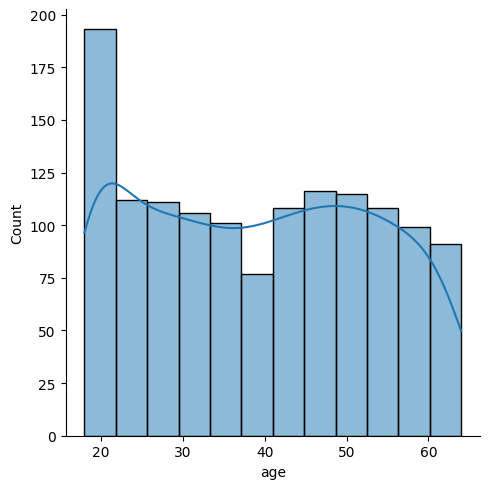

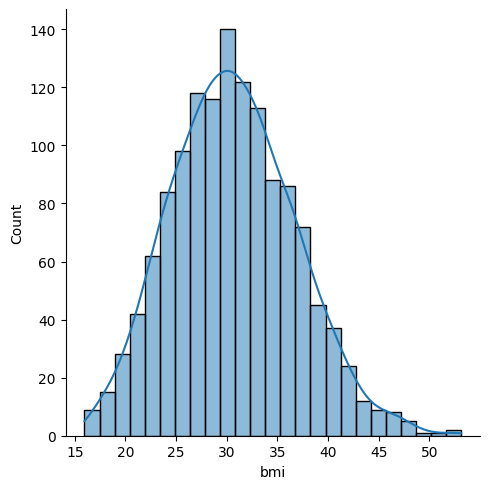

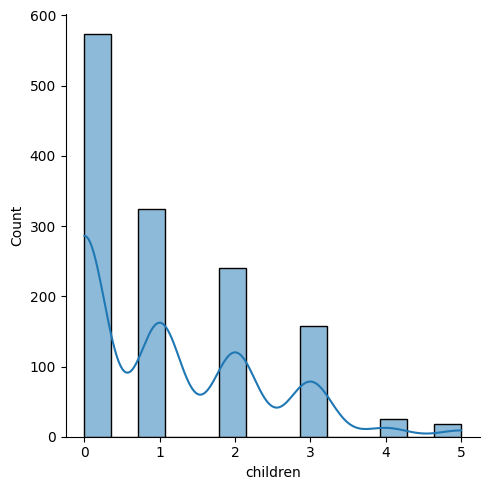

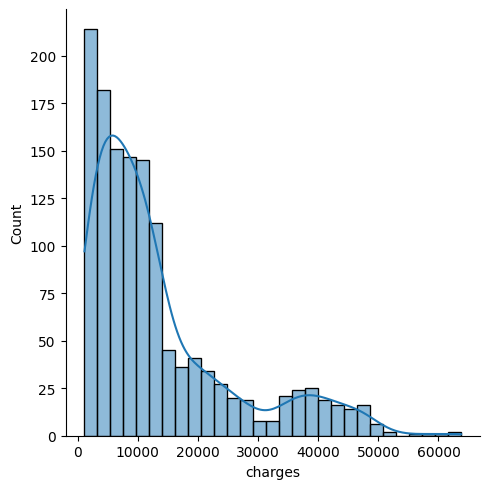

In [63]:
# 데이터 컬럼 타입이 np.number 인 것만 가져오기
numeric_data = data.select_dtypes(include=np.number)

# 데이터 컬럼 타입이 np.number 인 컬럼 이름들 가져오기
l = numeric_data.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns

# 컬럼별 히스토그램 그리기

# plt.figure(figsize=(20,20))
for i in range(0,len(l)):
    # plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.displot(numeric_data[l[i]],kde=True) # kde : kernel density

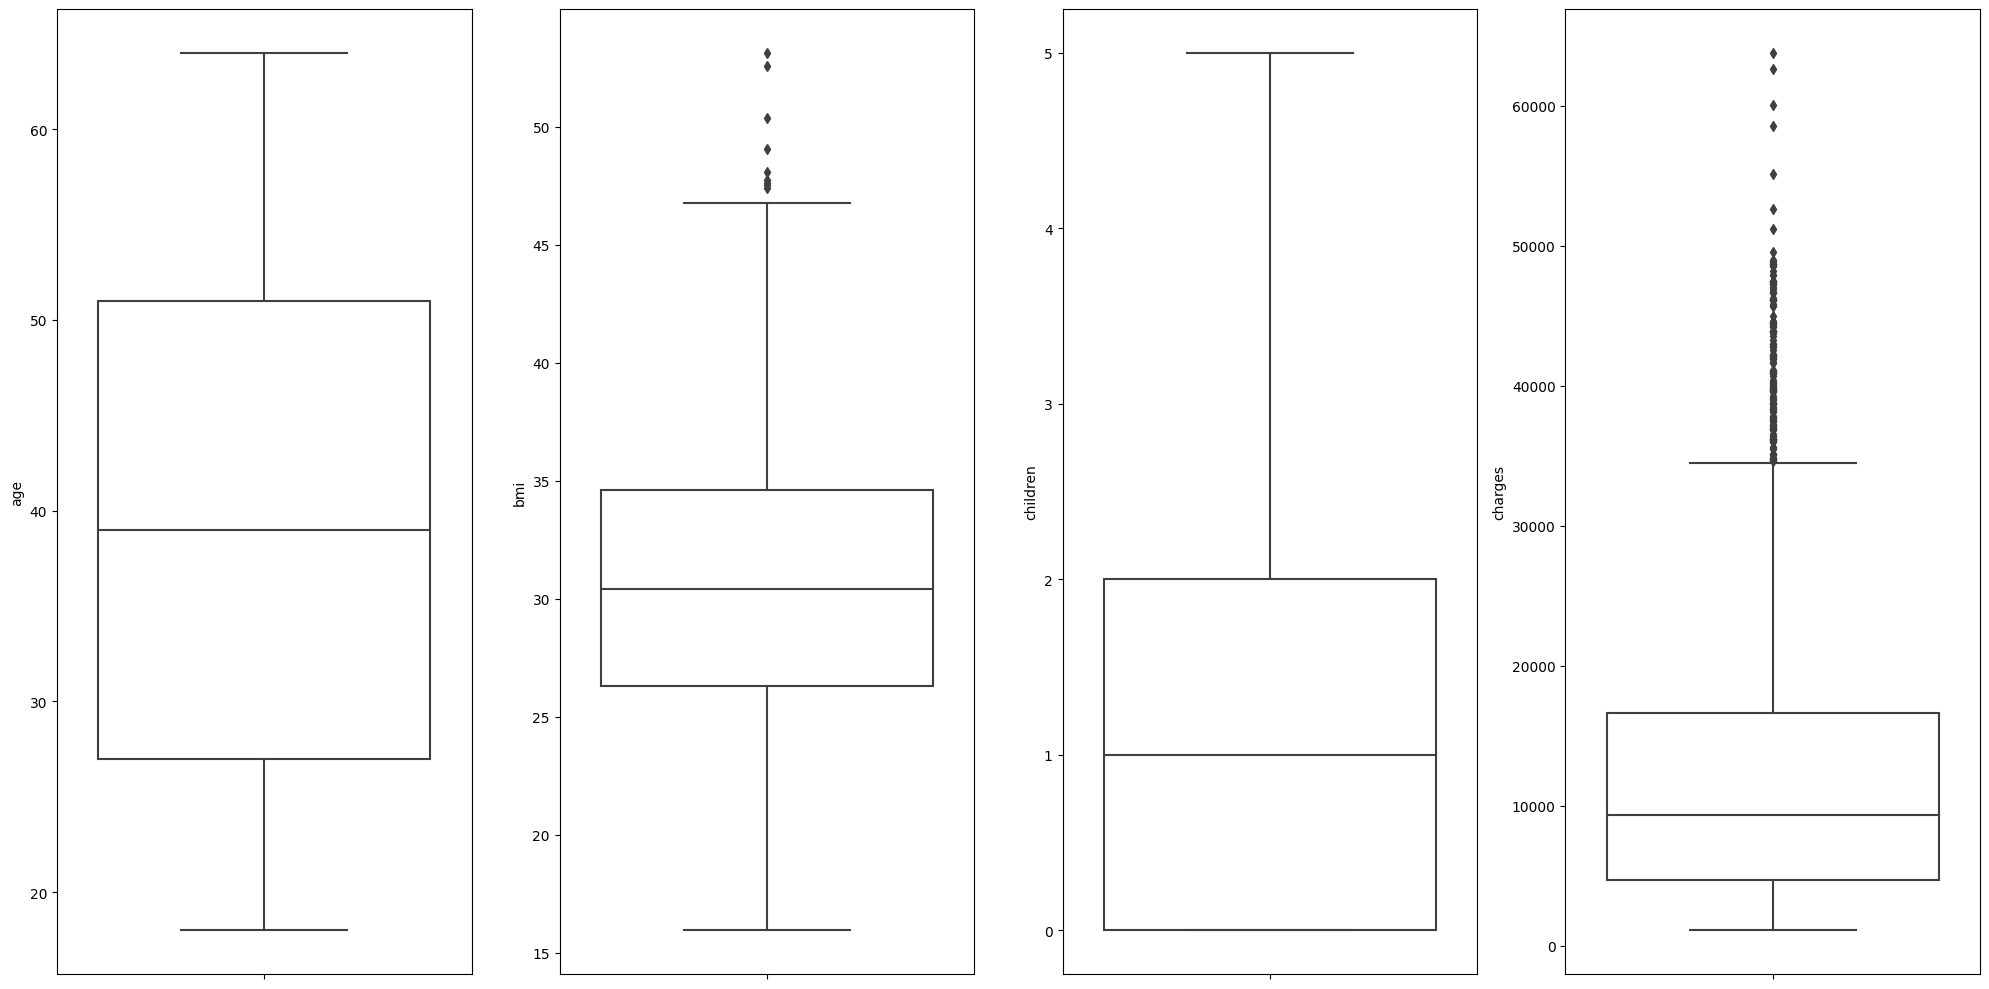

In [64]:
# 데이터 컬럼 타입이 np.number 인 컬럼들 가져오기
columns = data.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=data, boxprops={'facecolor': 'None'})
figure.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정한다.
plt.show()

<AxesSubplot:>

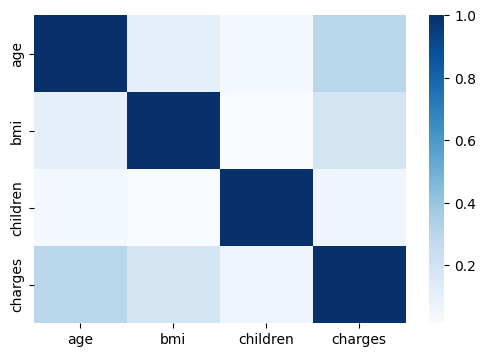

In [65]:
# Seaborn Heatmap 을 사용한 Correlation 시각화
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=False) 

<AxesSubplot:>

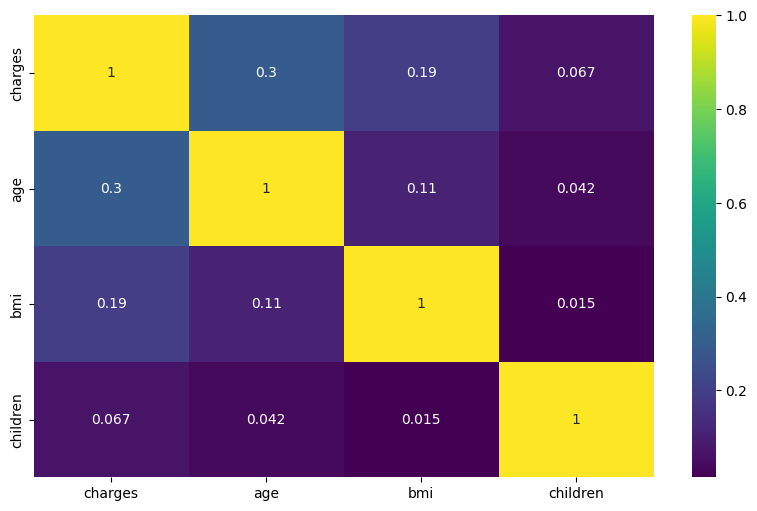

In [66]:
# 보험료 Correlation Matrix 시각화
k = 4 # Heatmap 에서 확인한 변수 개수
cols = data.corr().nlargest(k, 'charges')['charges'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [67]:
# 숫자형 데이터들만 copy() 를 사용하여 복사
X_num = data[['age', 'bmi', 'children']].copy()

# 변환했던 범주형 데이터들과 concat 을 사용하여 합치기
X_final = pd.concat([X_num, region, sex, smoker], axis = 1)

# 보험료 컬럼(charges)을 y 값으로 설정
y_final = data[['charges']].copy()

# train_test_split 을 사용하여 Training, Test 나누기 (Training:Test=2:1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0)

In [ ]:
## MinMaxScaler 를 사용하는 경우 : 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다

#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.transform(X_test.astype(np.float))

## StandardScaler 를 사용하는 경우 : 이상치가 있는 경우에는 균형 잡힌 결과를 보장하기 힘들다

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

## 그 외 - RobustScaler 를 사용하는 경우 : 이상치의 영향을 최소화한 기법. 중앙값과 IQR 을 사용하기 때문에 표준화 후 동일한 값을 더 넓게 분포시키게 된다.